In [1]:
# Рисовать графики сразу же
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from tensorflow.keras.callbacks import EarlyStopping

Читаем данные из файла airline-passengers

In [3]:
files.upload()
!ls

Saving airline-passengers.csv to airline-passengers (6).csv
'airline-passengers (1).csv'  'airline-passengers (5).csv'
'airline-passengers (2).csv'  'airline-passengers (6).csv'
'airline-passengers (3).csv'   airline-passengers.csv
'airline-passengers (4).csv'   sample_data


In [4]:
df = pd.read_csv('airline-passengers.csv')


In [5]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

In [7]:
# import datetime
# from datetime import datetime, date
# df['Year'] = pd.to_datetime(df['Month']).dt.year
# df['Month'] = pd.to_datetime(df['Month']).dt.month

In [8]:
target = df.iloc[:,1].values
# df.drop(['Passengers'], axis=1,inplace=True)

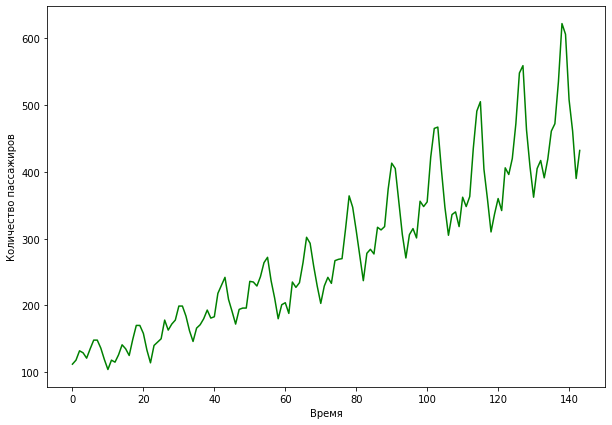

In [9]:
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(target,color="green")
plt.xlabel("Время")
plt.ylabel("Количество пассажиров")
plt.show()

In [10]:
target = target.reshape(-1,1)
target = target.astype("float32")
scaler = MinMaxScaler(feature_range=(0,1))
target = scaler.fit_transform(target)

In [11]:
train = []
test = []

train_len = 91
test_len = 51

train = target[:91]
test = target[91:]

In [12]:
time_step = 10
dataX = []
dataY = []
for i in range(len(train)-time_step-1):
    a = train[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(train[i + time_step, 0])
x_train = np.array(dataX)
y_train = np.array(dataY)  
print("The shape of x_train",x_train.shape)
print("The shape of y_train",y_train.shape)

The shape of x_train (80, 10)
The shape of y_train (80,)


In [16]:
dataX,dataY = [],[]
for i in range(len(test)-time_step-1):
    a = test[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(test[i + time_step, 0])
x_test = np.array(dataX)
y_test = np.array(dataY)
print("The shape of x_test",x_test.shape)
print("The shape of y_test", y_test.shape)

The shape of x_test (42, 10)
The shape of y_test (42,)


In [18]:
x_test = x_test.reshape((42,1,10))
x_train = x_train.reshape((80,1,10))
print("The shape of x_test",x_test.shape)
print("The shape of x_train",x_train.shape)

The shape of x_test (42, 1, 10)
The shape of x_train (80, 1, 10)


In [ ]:
# xLen = 3
# learning_rate = 0.001
# batch_size = 32
# epochs = 10

In [ ]:
# dataset_train = keras.preprocessing.timeseries_dataset_from_array(
#     x_train,
#     y_train,
#     sequence_length=xLen,
#     sampling_rate=1,
#     batch_size=batch_size,
# )
# dataset_val = keras.preprocessing.timeseries_dataset_from_array(
#     x_test,
#     y_test,
#     sequence_length=xLen,
#     sampling_rate=1,
#     batch_size=batch_size,
# )


In [ ]:
# for batch in dataset_train.take(2):
#     inputs, targets = batch

# print("Input shape:", inputs.numpy().shape)
# print("Target shape:", targets.numpy().shape)

In [19]:
# callback = EarlyStopping(monitor='val_mae', patience=5)

model1 = Sequential()
model1.add(LSTM(10, input_shape = (1, 10)))
model1.add(Dense(1))

model1.compile(optimizer = "adam", loss="mean_squared_error")

In [21]:
history1 = model1.fit(x_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 12/50
3/3 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 13/50
3/3 [==============================] - 0s 3ms/step - loss: 0.

In [22]:
trainPred = model1.predict(x_train) 
testPred = model1.predict(x_test)

#Taking Inverse
trainPred = scaler.inverse_transform(trainPred)
testPred = scaler.inverse_transform(testPred)

y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

In [23]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 33.50 RMSE
Test Score: 78.49 RMSE


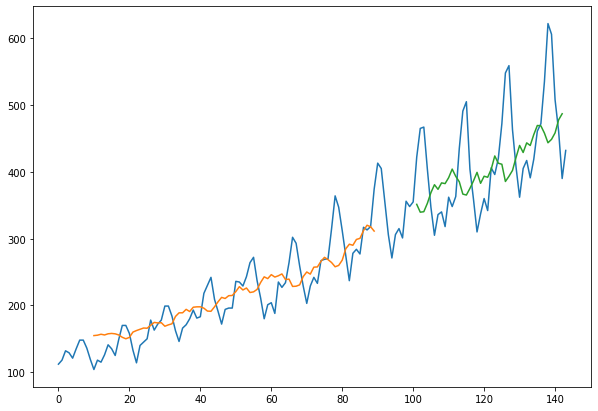

In [24]:
# shifting train
trainPredictPlot = np.empty_like(target)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPred)+time_step, :] = trainPred


# shifting test predictions for plotting
testPredictPlot = np.empty_like(target)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPred)+(time_step*2)+1:len(target)-1, :] = testPred


# plot baseline and predictions
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(scaler.inverse_transform(target))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()